# Protein differential expression exploration
Here we'll explore some visualizations of the proteomic differential expression data we exported from Scaffold Q+.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Read in the data
The formatting of the spreadsheets is very Excel-y, so we need to do some massaging to get the right headers. We are just going to ignore the first few rows, because the information we need is all in row 5.

In [2]:
two_vs_21 = pd.read_csv('../data/proteomics/2_vs_21_O2_de_results_median_permuatation_test.csv', header=4)
two_vs_21.head()

,#,Visible?,Starred?,Identified Proteins (5249),Accession Number,Alternate ID,Molecular Weight,Protein Grouping Ambiguity,Permutation Test (p-value) Benjamini-Hochberg (p < 0.00287),Log? Fold Change by Category (Treatment 1 / Reference),...,2D,Std Dev Log? Fold Change(2D),40A,Std Dev Log? Fold Change(40A),40B,Std Dev Log? Fold Change(40B),40C,Std Dev Log? Fold Change(40C),40D,Std Dev Log? Fold Change(40D)
0,1,True,Empty,Cluster of Ribulose bisphosphate carboxylase l...,O03042 [2],rbcL,53 kDa,True,0.24,0.01,...,0.0561,0.338172,0.0355,0.222095,-0.019,0.242519,0.0331,0.217806,-0.0506,0.217075
1,2,True,Empty,Cluster of Ribulose bisphosphate carboxylase s...,B3H5S2 [2],RBCS3B,21 kDa,True,0.46,-0.06,...,-0.1276,0.404424,-0.0087,0.218226,-0.0465,0.274465,-0.1309,0.226112,-0.1026,0.236224
2,3,True,Empty,"ATP synthase subunit beta, chloroplastic OS=Ar...",P19366,atpB,54 kDa,True,0.91,0.01,...,-0.0174,0.290842,-0.0021,0.220687,-0.1095,0.246779,-0.0375,0.241646,-0.0446,0.216729
3,4,True,Empty,Cluster of Oxygen-evolving enhancer protein 1-...,P23321 [2],PSBO1,35 kDa,True,0.75,0.04,...,0.0018,0.326223,0.0575,0.224858,-0.1052,0.225662,-0.1332,0.218697,-0.0319,0.213534
4,5,True,Empty,Ribulose bisphosphate carboxylase/oxygenase ac...,P10896,RCA,52 kDa,NaN,0.11,-0.02,...,0.0139,0.303845,0.0267,0.233504,-0.0582,0.228038,-0.1016,0.222522,-0.075,0.214904


In [3]:
forty_vs_21 = pd.read_csv('../data/proteomics/40_vs_21_O2_de_results_median_permutation_test.csv', header=4)
forty_vs_21.head()

,#,Visible?,Starred?,Identified Proteins (5249),Accession Number,Alternate ID,Molecular Weight,Protein Grouping Ambiguity,Permutation Test (p-value) Benjamini-Hochberg (p < 0.00598),Log? Fold Change by Category (Treatment 2 / Reference),...,2D,Std Dev Log? Fold Change(2D),40A,Std Dev Log? Fold Change(40A),40B,Std Dev Log? Fold Change(40B),40C,Std Dev Log? Fold Change(40C),40D,Std Dev Log? Fold Change(40D)
0,1,True,Empty,Cluster of Ribulose bisphosphate carboxylase l...,O03042 [2],rbcL,53 kDa,True,0.66,0.00,...,0.0561,0.338172,0.0355,0.222095,-0.019,0.242519,0.0331,0.217806,-0.0506,0.217075
1,2,True,Empty,Cluster of Ribulose bisphosphate carboxylase s...,B3H5S2 [2],RBCS3B,21 kDa,True,0.45,-0.07,...,-0.1276,0.404424,-0.0087,0.218226,-0.0465,0.274465,-0.1309,0.226112,-0.1026,0.236224
2,3,True,Empty,"ATP synthase subunit beta, chloroplastic OS=Ar...",P19366,atpB,54 kDa,True,0.00061,-0.04,...,-0.0174,0.290842,-0.0021,0.220687,-0.1095,0.246779,-0.0375,0.241646,-0.0446,0.216729
3,4,True,Empty,Cluster of Oxygen-evolving enhancer protein 1-...,P23321 [2],PSBO1,35 kDa,True,0.44,-0.03,...,0.0018,0.326223,0.0575,0.224858,-0.1052,0.225662,-0.1332,0.218697,-0.0319,0.213534
4,5,True,Empty,Ribulose bisphosphate carboxylase/oxygenase ac...,P10896,RCA,52 kDa,NaN,0.0002,-0.05,...,0.0139,0.303845,0.0267,0.233504,-0.0582,0.228038,-0.1016,0.222522,-0.075,0.214904


The p-value cutoff in the column headers always changes, so let's define a variable for that particular column name so in case we have to change the dataframe again, we don't have to worry about manually replacing it:

In [4]:
two_pval_col_name = "Permutation Test (p-value) Benjamini-Hochberg (p < 0.00287)"
forty_pval_col_name = "Permutation Test (p-value) Benjamini-Hochberg (p < 0.00598)"
two_pval_cutoff = 0.00287
forty_pval_cutoff = 0.00598

## Exploratory data anlysis
Let's just get an idea for what's going on with some basic plots.

Something I'm curious about is how some of the proteins test significant but seem to have very little fold change, so let's look at the correlation between p-value and logFC.

When the p-value is very small, Scaffold just reports it as the string `< 0.0001`, so we need to change those all to some number in order to be able to plot them; I'm just going to change them all to `0.00009`. There are also some null p-values represetned by `--`, I am going to replace these with `np.nan`

In [5]:
two_vs_21[two_pval_col_name] = two_vs_21[two_pval_col_name].replace('< 0.0001', '0.00009')
forty_vs_21[forty_pval_col_name] = forty_vs_21[forty_pval_col_name].replace('< 0.0001', '0.00009')

two_vs_21[two_pval_col_name] = two_vs_21[two_pval_col_name].replace('--', np.nan)
forty_vs_21[forty_pval_col_name] = forty_vs_21[forty_pval_col_name].replace('--', np.nan)

In [6]:
two_vs_21[two_pval_col_name] = two_vs_21[two_pval_col_name].astype('float64')
forty_vs_21[forty_pval_col_name] = forty_vs_21[forty_pval_col_name].astype('float64')

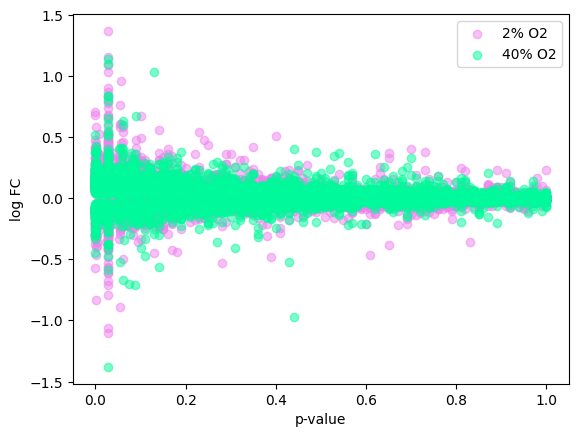

In [7]:
plt.scatter(two_vs_21[two_pval_col_name], two_vs_21["Log? Fold Change by Category (Treatment 1 / Reference)"], color='violet', label='2% O2', alpha=0.5)
plt.scatter(forty_vs_21[forty_pval_col_name], forty_vs_21["Log? Fold Change by Category (Treatment 2 / Reference)"], color='mediumspringgreen', label='40% O2', alpha=0.5)
plt.ylabel('log FC')
plt.xlabel('p-value')
plt.legend()

That actually looks pretty good! The proteins that are more highly up or down regulated are located near a p-value of 0.

I am also interested in the distribution of log FC across the two conditions:

Text(0.5, 0, 'log FC')

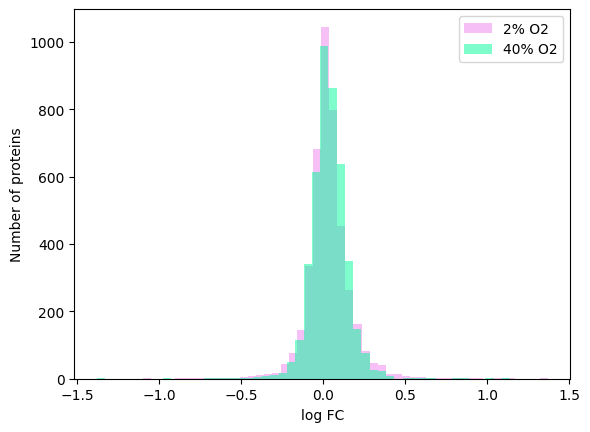

In [8]:
plt.hist(two_vs_21["Log? Fold Change by Category (Treatment 1 / Reference)"], color='violet', label='2% O2', alpha=0.5, bins=50)
plt.hist(forty_vs_21["Log? Fold Change by Category (Treatment 2 / Reference)"], color='mediumspringgreen', label='40% O2', alpha=0.5, bins=50)
plt.legend()
plt.ylabel('Number of proteins')
plt.xlabel('log FC')

Next let's look at the distribution of log FC for the significant ones only:

Text(0.5, 0, 'log FC')

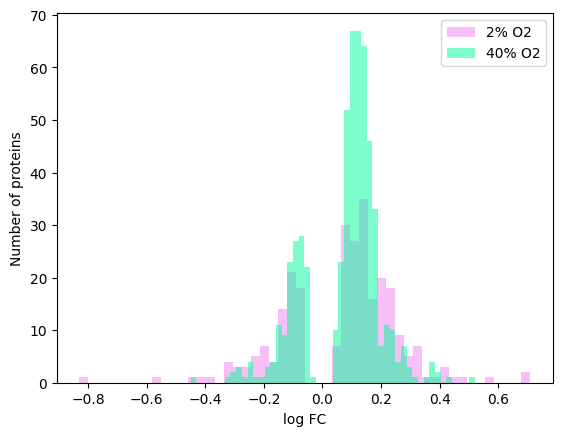

In [9]:
two_signif = two_vs_21["Log? Fold Change by Category (Treatment 1 / Reference)"][two_vs_21[two_pval_col_name] < two_pval_cutoff]
forty_signif = forty_vs_21["Log? Fold Change by Category (Treatment 2 / Reference)"][forty_vs_21[forty_pval_col_name] < forty_pval_cutoff]
plt.hist(two_signif, color='violet', label='2% O2', alpha=0.5, bins=50)
plt.hist(forty_signif, color='mediumspringgreen', label='40% O2', alpha=0.5, bins=50)
plt.legend()
plt.ylabel('Number of proteins')
plt.xlabel('log FC')

How many of the total proteins are significantly up or downregulated in each condition?

In [10]:
print(f'{len(two_signif)} of {len(two_vs_21)} total proteins are significantly differentially expressed at 2% O2')
print(f'{len(forty_signif)} of {len(forty_vs_21)} total proteins are significantly differentially expressed at 40% O2')

268 of 4307 total proteins are significantly differentially expressed at 2% O2
556 of 4307 total proteins are significantly differentially expressed at 40% O2


I'm also interested in the identity of the proteins that are identified in each of the conditions. That is, are the most highly up and downregulated proteins the same or different across the two samples? Let's check the set intersections:

In [11]:
two_top_ten_up = two_vs_21[two_vs_21[two_pval_col_name] < two_pval_cutoff].sort_values("Log? Fold Change by Category (Treatment 1 / Reference)", ascending=False).head(10)["Identified Proteins (5249)"]
two_top_ten_down = two_vs_21[two_vs_21[two_pval_col_name] < two_pval_cutoff].sort_values("Log? Fold Change by Category (Treatment 1 / Reference)", ascending=True).head(10)["Identified Proteins (5249)"]
forty_top_ten_up = forty_vs_21[forty_vs_21[forty_pval_col_name] < forty_pval_cutoff].sort_values("Log? Fold Change by Category (Treatment 2 / Reference)", ascending=False).head(10)["Identified Proteins (5249)"]
forty_top_ten_down = forty_vs_21[forty_vs_21[forty_pval_col_name] < forty_pval_cutoff].sort_values("Log? Fold Change by Category (Treatment 2 / Reference)", ascending=True).head(10)["Identified Proteins (5249)"]

In [12]:
print(f'There are {len(set(two_top_ten_up).intersection(forty_top_ten_up))} upregulated proteins in common between 2% and 40% O2.')

print(f'There are {len(set(two_top_ten_down).intersection(forty_top_ten_down))} downregulated proteins in common between 2% and 40% O2')

print(f'There are {len(set(two_top_ten_down + two_top_ten_up).intersection(forty_top_ten_down + forty_top_ten_up))} differentially expressed proteins in common between 2% and 40% O2')

There are 1 upregulated proteins in common between 2% and 40% O2.
There are 1 downregulated proteins in common between 2% and 40% O2
There are 1 differentially expressed proteins in common between 2% and 40% O2


Certainly in terms of string similarity we aren't seeing anything, but the protein groupings in this dataset are almost all marked as low confidence, and it's very possible that different names are similar proteins, so we'll have to investigate further here.

## PCA
As a quality control evaluation, we want to plot a PCA. While I'm not totally sure what was originally used to construct the PCA< my best guess is that it was probably the Quantitative Samples Report, so let's start with that.

In [12]:
quant_peps = pd.read_csv('../data/proteomics/quant_peptide_report.csv', header=60)
quant_peps.head()

/tmp/local/49794431/ipykernel_2550013/3215852414.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  quant_peps = pd.read_csv('../data/proteomics/quant_peptide_report.csv', header=60)


,Experiment,Protein Name,Accession Numbers,Alternate IDs,Valid,Exclusive,Sequence,Prob,Modifications,Andromeda P-score,...,40B,40C,40D,+1H,+2H,+3H,+4H,Start,Stop,Other Proteins
0,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,aLAALRLEDLR,99%,TMT-16plex (+304),70.332,...,-0.1921,0.4229,-0.06103,0.0,1.0,1.0,0.0,129.0,139.0,NaN
1,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,aMHAVIDR,99%,TMT-16plex (+304),89.355,...,-0.05328,-0.1876,-0.009287,0.0,1.0,2.0,0.0,296.0,303.0,NaN
2,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,amHAVIDR,99%,"TMT-16plex (+304), Oxidation (+16)",76.774,...,-0.06467,-0.1137,0.07657,0.0,3.0,3.0,0.0,296.0,303.0,NaN
3,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,dLAVEGNEIIR,100%,TMT-16plex (+304),98.943,...,-0.0944,0.02082,-0.0532,0.0,78.0,28.0,0.0,436.0,446.0,NaN
4,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,dNGLLLHIHR,100%,TMT-16plex (+304),110.390,...,0.1108,0.09854,0.05796,0.0,3.0,7.0,5.0,286.0,295.0,NaN


We need to transpose the data and remove the labels in order to prep the data for PCA:

In [14]:
quant_peps.columns

Index(['Experiment', 'Protein Name', 'Accession Numbers', 'Alternate IDs',
       'Valid', 'Exclusive', 'Sequence', 'Prob', 'Modifications',
       'Andromeda P-score', 'preA', 'preB', 'preC', 'preD', '2A', '2B', '2C',
       '2D', '21A', '21B', '21C', '21D', '40A', '40B', '40C', '40D', '+1H',
       '+2H', '+3H', '+4H', 'Start', 'Stop', 'Other Proteins'],
      dtype='object')

In [50]:
sample_names = ['2A', '2B', '2C', '2D', '21A', '21B', '21C', '21D', '40A', '40B', '40C', '40D']

In [30]:
quant_for_pca = quant_peps[sample_names].iloc[:-1].T
quant_for_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,30652,30653,30654,30655,30656,30657,30658,30659,30660,30661
2A,-0.3062,0.07164,-0.2487,0.006535,-0.05288,-0.1369,-0.03165,-0.02267,0.03622,0.03875,...,-0.2111,0.3179,0.01843,-0.001873,0.1336,0.1218,-0.0446,0.1614,0.1639,-0.2344
2B,-0.2685,-0.1261,-0.3997,-0.04212,-0.07011,-0.1985,-0.0718,-0.02666,0.02525,-0.02309,...,-0.1242,0.7692,-0.1899,0.003677,-0.07641,-0.0481,-0.1376,0.1311,-0.05667,-0.01018
2C,0.04936,0.7227,0.4863,0.02957,-0.01965,0.3997,0.04544,0.03397,0.05075,0.008318,...,-0.0871,0.01851,-0.09219,0.05311,-0.2307,0.3061,-0.205,0.1709,0.2928,-0.3262
2D,-0.003336,0.6665,0.3791,0.03275,0.1778,0.5936,0.04651,-0.1287,0.007793,-0.07853,...,-0.1269,-0.3057,-0.1259,-0.0008259,-0.03617,0.346,-0.09506,0.07363,0.08654,-0.1544
21A,0.2338,-0.2158,-0.2298,0.06059,-0.04571,0.01073,0.0624,0.01042,0.008648,-0.02993,...,0.069,0.2322,-0.03095,0.02343,-0.08317,0.1683,0.04502,0.2454,-0.2208,-0.0008907


There are of course no standard values filling in places where there's missing data, so we have to replace several kinds of strings in order to convert the datatypes of each column to floats:

In [41]:
a = (quant_for_pca.fillna(1).apply(lambda x: pd.to_numeric(x, errors='coerce')))
row_idxs, col_idxs = np.where(pd.isnull(a))
nan_strings = [quant_for_pca.iloc[i, j] for i, j in zip(row_idxs, col_idxs)]
print(set(nan_strings))

{'No values', 'Value missing', 'Reference missing'}


In [88]:
quant_for_pca = quant_for_pca.replace(['No values', 'Value missing', 'Reference missing'], 0)
quant_for_pca = quant_for_pca.astype('float64')

In [89]:
X = quant_for_pca.to_numpy()
y = np.array([i[:-1] + '% O2' for i in quant_for_pca.index.tolist()])

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

Text(0, 0.5, 'PC2 (22.08%)')

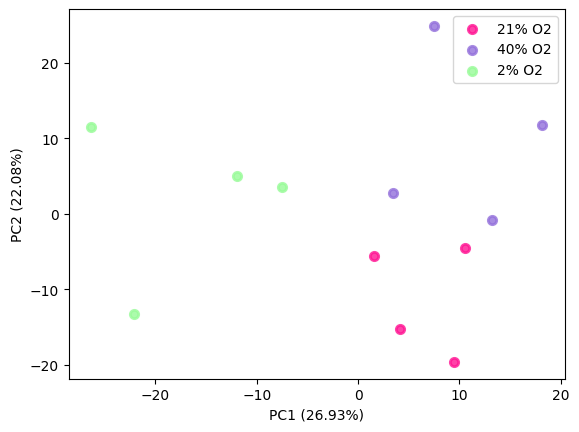

In [91]:
plt.figure()
colors = ["deeppink", "mediumpurple", "palegreen"]
sample_groups = np.array(list(set([i[:-1] + '% O2' for i in sample_names])))
pc1_ex_var, pc2_ex_var = pca.explained_variance_ratio_
lw = 2

for color, i, group in zip(colors, sample_groups, sample_groups):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=group
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel(f'PC1 ({pc1_ex_var*100:.2f}%)')
plt.ylabel(f'PC2 ({pc2_ex_var*100:.2f}%)')

This is a very different PCA than the one that Kaila reported, so maybe the quantitative peptide information is not what I should be using the build the PCA. Let's try this using the Quantitative Spectrum Report instead:

In [84]:
quant_spec = pd.read_csv('../data/proteomics/quant_spectrum_report.csv', header=60)
quant_spec.head()

/tmp/local/49794431/ipykernel_2550013/222574151.py:1: DtypeWarning: Columns (4,5,12,17,21,22,23,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  quant_spec = pd.read_csv('../data/proteomics/quant_spectrum_report.csv', header=60)


,Experiment,Protein Name,Accession Numbers,Alternate IDs,Valid,Exclusive,Sequence,Prob,Modifications,Andromeda P-score,...,Stdev,Log Intensity,Observed,Actual Mass,Charge,Delta Da,Delta PPM,Spectrum ID,Bio Sample,MS/MS Sample
0,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,aLAALRLEDLR,99%,TMT-16plex (+304),70.332,...,0.133170,26.555466,772.975817,1543.937081,2.0,0.000124,0.080535,"hf2023072714,scan_23915,type_MULTI-MSMS",Walker Data,Data: hf2023072701 and 11 more
1,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,aLAALRLEDLR,100%,TMT-16plex (+304),120.770,...,0.132281,27.089565,515.652964,1543.937065,3.0,0.000140,0.090891,"hf2023072714,scan_23907,type_MULTI-MSMS",Walker Data,Data: hf2023072701 and 11 more
2,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,aMHAVIDR,99%,TMT-16plex (+304),89.355,...,0.140456,24.809607,406.231234,1215.671875,3.0,0.000072,0.058876,"hf2023072714,scan_10177,type_MULTI-MSMS",Walker Data,Data: hf2023072701 and 11 more
3,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,aMHAVIDR,99%,TMT-16plex (+304),106.140,...,0.132234,27.550098,608.843217,1215.671881,2.0,0.000066,0.053944,"hf2023072714,scan_10176,type_MULTI-MSMS",Walker Data,Data: hf2023072701 and 11 more
4,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,aMHAVIDR,99%,TMT-16plex (+304),90.657,...,0.140456,24.745186,406.231234,1215.671875,3.0,0.000072,0.058876,"hf2023072703,scan_10173,type_MULTI-MSMS",Walker Data,Data: hf2023072701 and 11 more


In [106]:
quant_spec_for_pca = quant_spec[sample_names].iloc[:-1].T
quant_spec_for_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,71300,71301,71302,71303,71304,71305,71306,71307,71308,71309
2A,-0.1736,-0.4399,-0.03464,0.1196,0.1226,-0.3159,-0.1643,-0.5112,-0.4337,0.0593,...,-0.2118,0.3169,0.01781,-0.002424,0.133,0.1211,-0.0452,0.1608,0.1631,-0.2351
2B,-0.008904,-0.5286,-0.1753,-0.09943,-0.1041,-0.7557,-0.3418,-0.4429,-0.5164,-0.3044,...,-0.125,0.7683,-0.1906,0.003126,-0.07696,-0.0488,-0.1382,0.1305,-0.05738,-0.01082
2C,0.05798,0.03921,0.7789,0.9298,0.2868,0.4738,0.558,0.3746,0.3907,1.046,...,-0.08782,0.01757,-0.09281,0.05256,-0.2313,0.3047,-0.2056,0.1703,0.2914,-0.3268
2D,0.007103,-0.0153,0.7057,0.9085,0.2176,0.2487,0.3372,0.2304,0.3857,1.056,...,-0.1277,-0.3066,-0.1265,-0.001377,-0.03672,0.3446,-0.09566,0.07305,0.08583,-0.155
21A,0.1367,0.3269,-0.2841,-0.1885,-0.1804,-0.1842,-0.1857,-0.1029,-0.06998,-0.4215,...,0.06827,0.2312,-0.03157,0.02288,-0.08372,0.1676,0.04442,0.2448,-0.2216,-0.001535


In [107]:
a = (quant_spec_for_pca.fillna(1).apply(lambda x: pd.to_numeric(x, errors='coerce')))
row_idxs, col_idxs = np.where(pd.isnull(a))
nan_strings = [quant_spec_for_pca.iloc[i, j] for i, j in zip(row_idxs, col_idxs)]
print(set(nan_strings))

{'Reference missing (-0.30913162)', 'No values (0.0780735)', 'Value missing (0.12872124)', 'Value missing (0.109939575)', 'Value missing (-0.22015953)', 'No values (0.014966965)', 'Value missing (0.15085793)', 'Value missing (-0.058259964)', 'Value missing (-0.11643982)', 'Value missing (0.16451454)', 'Reference missing (-0.095454216)', 'Value missing (0.04109192)', 'Value missing (-7.5530586)', 'Value missing (-0.37354088)', 'Value missing (-0.09176636)', 'Value missing (0.15303993)', 'Value missing (-0.108854294)', 'Value missing (-0.23513031)', 'Value missing (-0.120456696)', 'Value missing (0.051700592)', 'Value missing (-0.07111931)', 'Value missing (-0.06458092)', 'Value missing (-0.16052628)', 'Value missing (-0.1694603)', 'Value missing (-0.741127)', 'Value missing (0.037750244)', 'Value missing (-1.3690319)', 'Value missing (-2.3468761)', 'Reference missing (0.116532326)', 'No values (0.025053024)', 'No values (0.08815956)', 'No values (0.10431671)', 'Value missing (0.08371162

It's unclear to me what the values are in parentheses if those values are supposedly missing, just going to replace them all with `NaN`:

In [108]:
nan_strings = list(set([i[:i.index('(')] + '*' for i in nan_strings]))
print(nan_strings)
quant_spec_for_pca = quant_spec_for_pca.replace(nan_strings, 0, regex=True)
quant_spec_for_pca = quant_spec_for_pca.astype('float64')

['No values *', 'Reference missing *', 'Value missing *']


/tmp/local/49794431/ipykernel_2550013/987023305.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  quant_spec_for_pca = quant_spec_for_pca.replace(nan_strings, 0, regex=True)


In [109]:
X = quant_spec_for_pca.to_numpy()
y = np.array([i[:-1] + '% O2' for i in quant_spec_for_pca.index.tolist()])

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

Text(0, 0.5, 'PC2 (20.21%)')

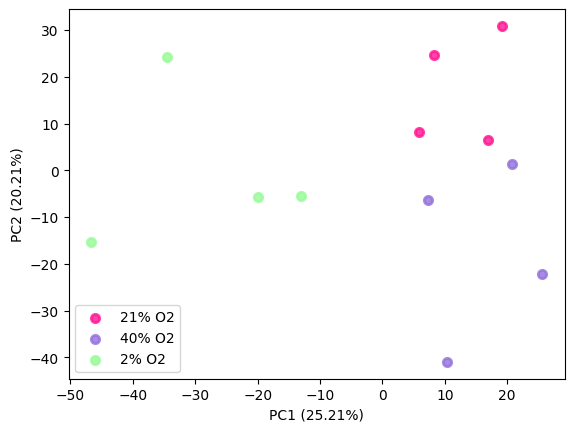

In [110]:
plt.figure()
colors = ["deeppink", "mediumpurple", "palegreen"]
sample_groups = np.array(list(set([i[:-1] + '% O2' for i in sample_names])))
pc1_ex_var, pc2_ex_var = pca.explained_variance_ratio_
lw = 2

for color, i, group in zip(colors, sample_groups, sample_groups):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=group
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel(f'PC1 ({pc1_ex_var*100:.2f}%)')
plt.ylabel(f'PC2 ({pc2_ex_var*100:.2f}%)')

Also doesn't look like Xinyu's, not totally sure what else I would use. The Google AI box says that usually peptide abundances are used, which is what I initially did; I'm not sure what Xinyu did, but I am going to leave this here for now.